### Importa os módulos necessários:

In [1]:
# Importa pandas como pd:
import pandas as pd
# Importa metodos_descritivos como mdes: 
import metodos_descritivos as mdes
# Importa numpy como np:
import numpy as np

# Prepara os dados:

In [2]:
'''
Função para substituir NaN com valores de uma distribuição normal.

Parâmetros:
    df: dataframe;
    atributo: nome de um atributo do dataframe.
'''
def substitui_nan_por_distribuicao_normal(df, atributo):
    # Calcula a média dos valores não nulos:
    media = df[atributo].mean()
    # Calcula a variância dos valores não nulos:
    variancia = df[atributo].var()
    # Calcula o desvio padrão doos valores não nulos:
    desvio_padrao = np.sqrt(variancia)
    # Gera números aleatórios pertencentes a respectiva distribuição normal:
    valores_gerados = np.random.normal(loc=media, scale=desvio_padrao, size=df[atributo].isna().sum())
    # Substitui os NaN pelos número gerados:
    df.loc[df[atributo].isna(), atributo] = valores_gerados
    # Retorna o dataframe tratado:
    return df

# caminho: caminho do arquivo a ser prepardo;
def prepara_os_dados(caminho):
    # Lê arquivo:
    df = pd.read_pickle(caminho)
    # Substitui -9999.0 por NaN (valor ausente):
    df = df.replace(-9999.0, float('nan'))
    # Dropa alguns atributos:
    df = df.drop(columns=["DATA (YYYY-MM-DD)", "HORA (UTC)", "RADIACAO GLOBAL (KJ/m²)",
                            'RADIACAO GLOBAL (Kj/m²)', 'Hora UTC', 'Data'])
    # Remove as tuplas que contêm qualquer valor NaN e recalcula os índices após a remoção:
    # df = df.dropna().reset_index()
    # Dropa o atributo index:
    # df = df.drop(columns=['index'])
    substitui_nan_por_distribuicao_normal(df, "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)")
    substitui_nan_por_distribuicao_normal(df, "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)")
    substitui_nan_por_distribuicao_normal(df, "RADIACAO_GLOBAL(Kj/m²)_mod")
    # Retorna dataframe:
    return df

In [3]:
df_DF = prepara_os_dados("./Dados/dataframe_A001_mod.pkl")
df_AM = prepara_os_dados("./Dados/dataframe_A101_mod.pkl")
df_BA = prepara_os_dados("./Dados/dataframe_A401_mod.pkl")
df_RJ = prepara_os_dados("./Dados/dataframe_A601_mod.pkl")
df_RS = prepara_os_dados("./Dados/dataframe_A801_mod.pkl")

# Descreve os dados:

In [4]:
atr_temporal = "Date_mod"

## Temperatura do Ar:

In [5]:
atr_imagem = "TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"

### Distrito Federal:

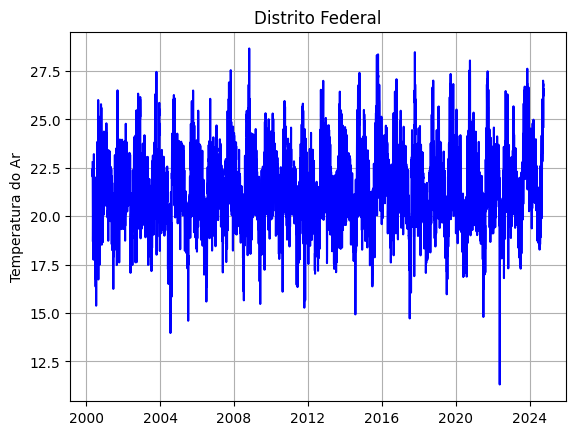

In [6]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_DF, atr_temporal, atr_imagem, "Distrito Federal", "Temperatura do Ar")

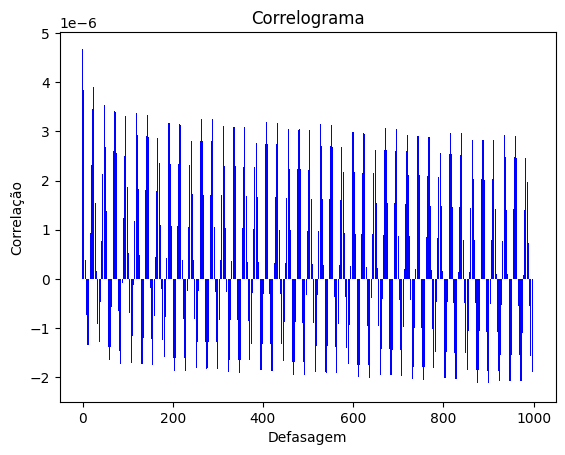

In [7]:
mdes.plota_correlograma(df_DF.shape[0], df_DF[atr_imagem].tolist(), 1000)

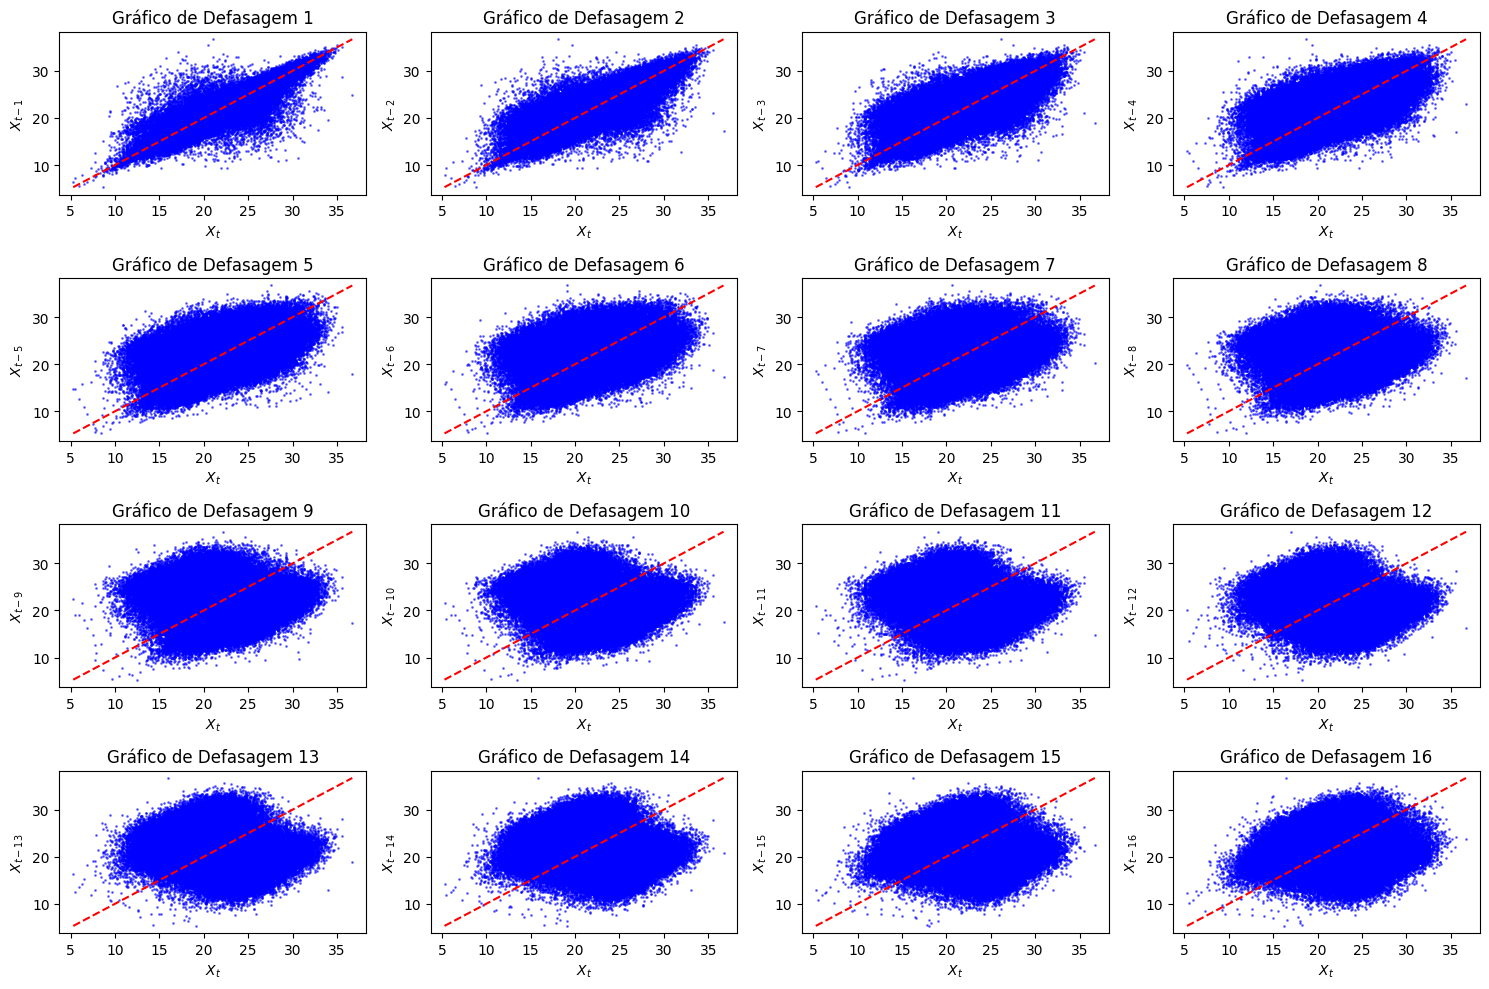

In [8]:
# mdes.plota_grafico_de_defasagens(df_DF.shape[0], df_DF[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_DF.shape[0], df_DF[atr_imagem].tolist(), 16)

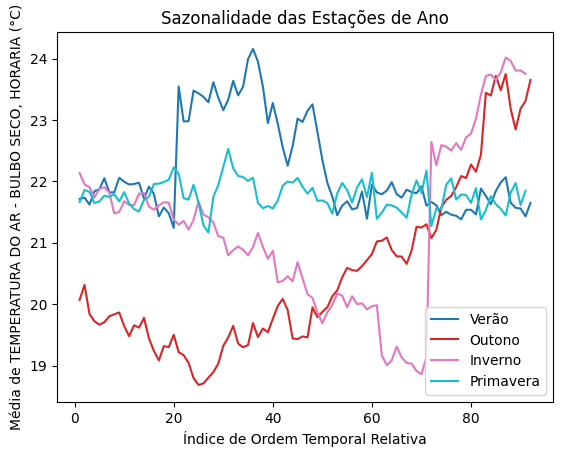

In [9]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_DF, atr_temporal, atr_imagem)

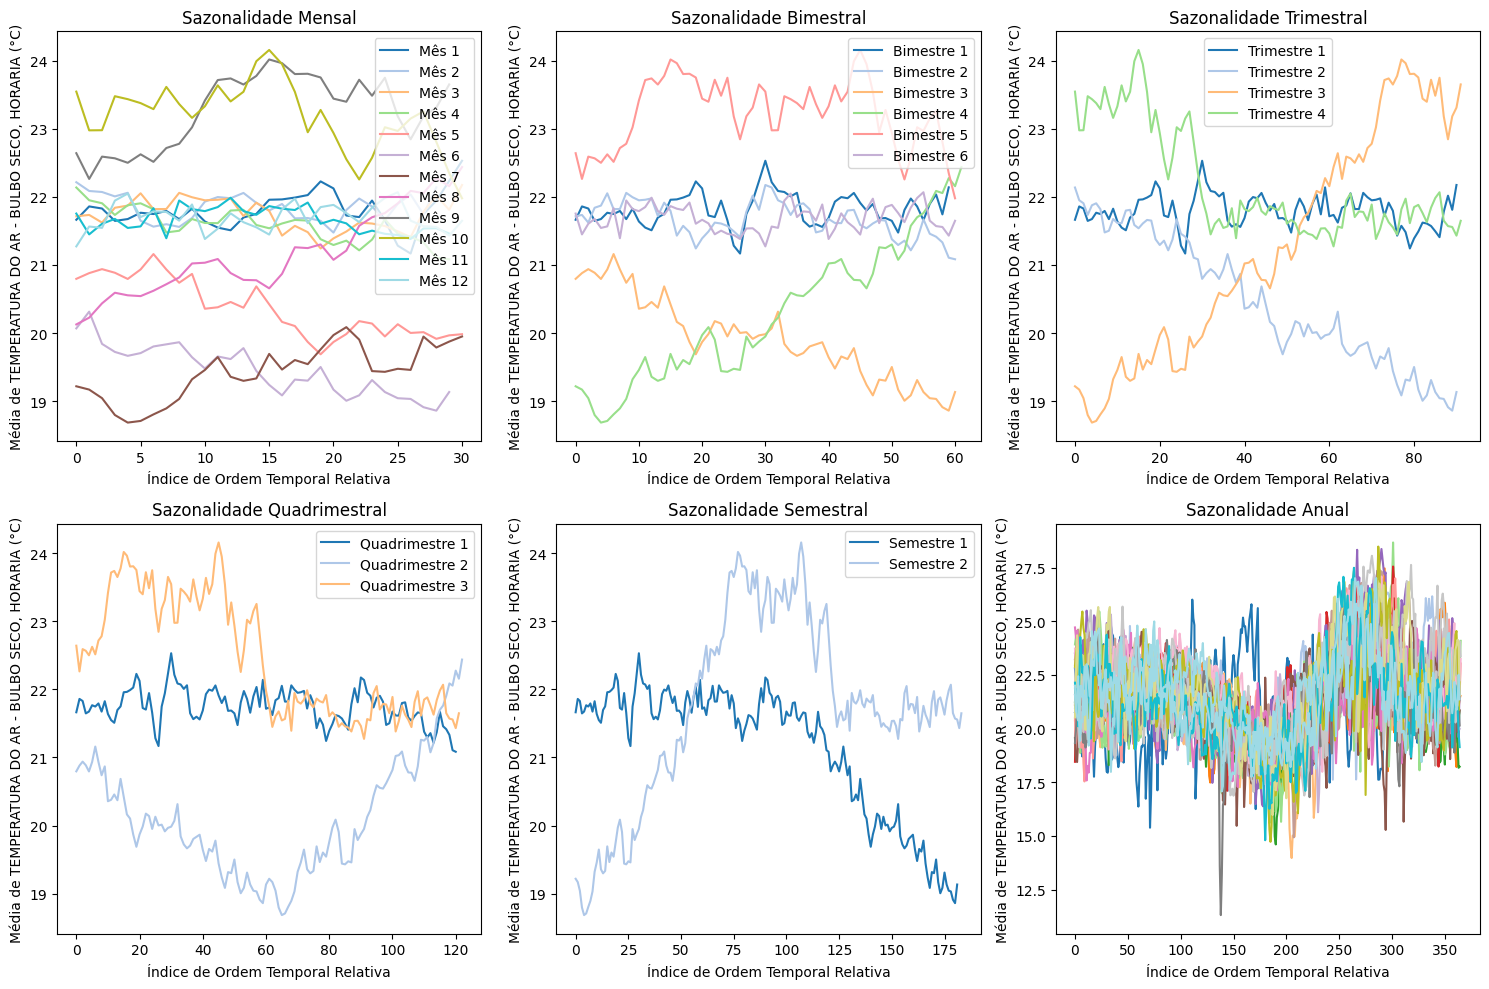

In [10]:
mdes.plota_grafico_de_sazonalidade_geral(df_DF, atr_temporal, atr_imagem)

### Manaus:

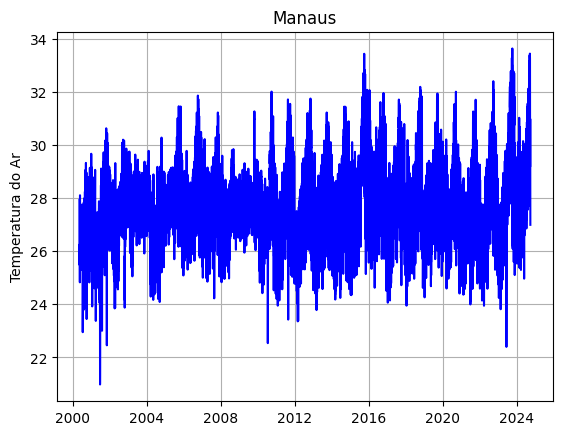

In [11]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_AM, atr_temporal, atr_imagem, "Manaus", "Temperatura do Ar")

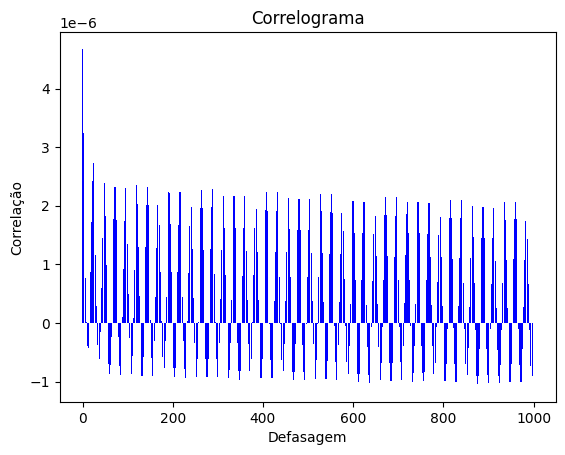

In [12]:
mdes.plota_correlograma(df_AM.shape[0], df_AM[atr_imagem].tolist(), 1000)

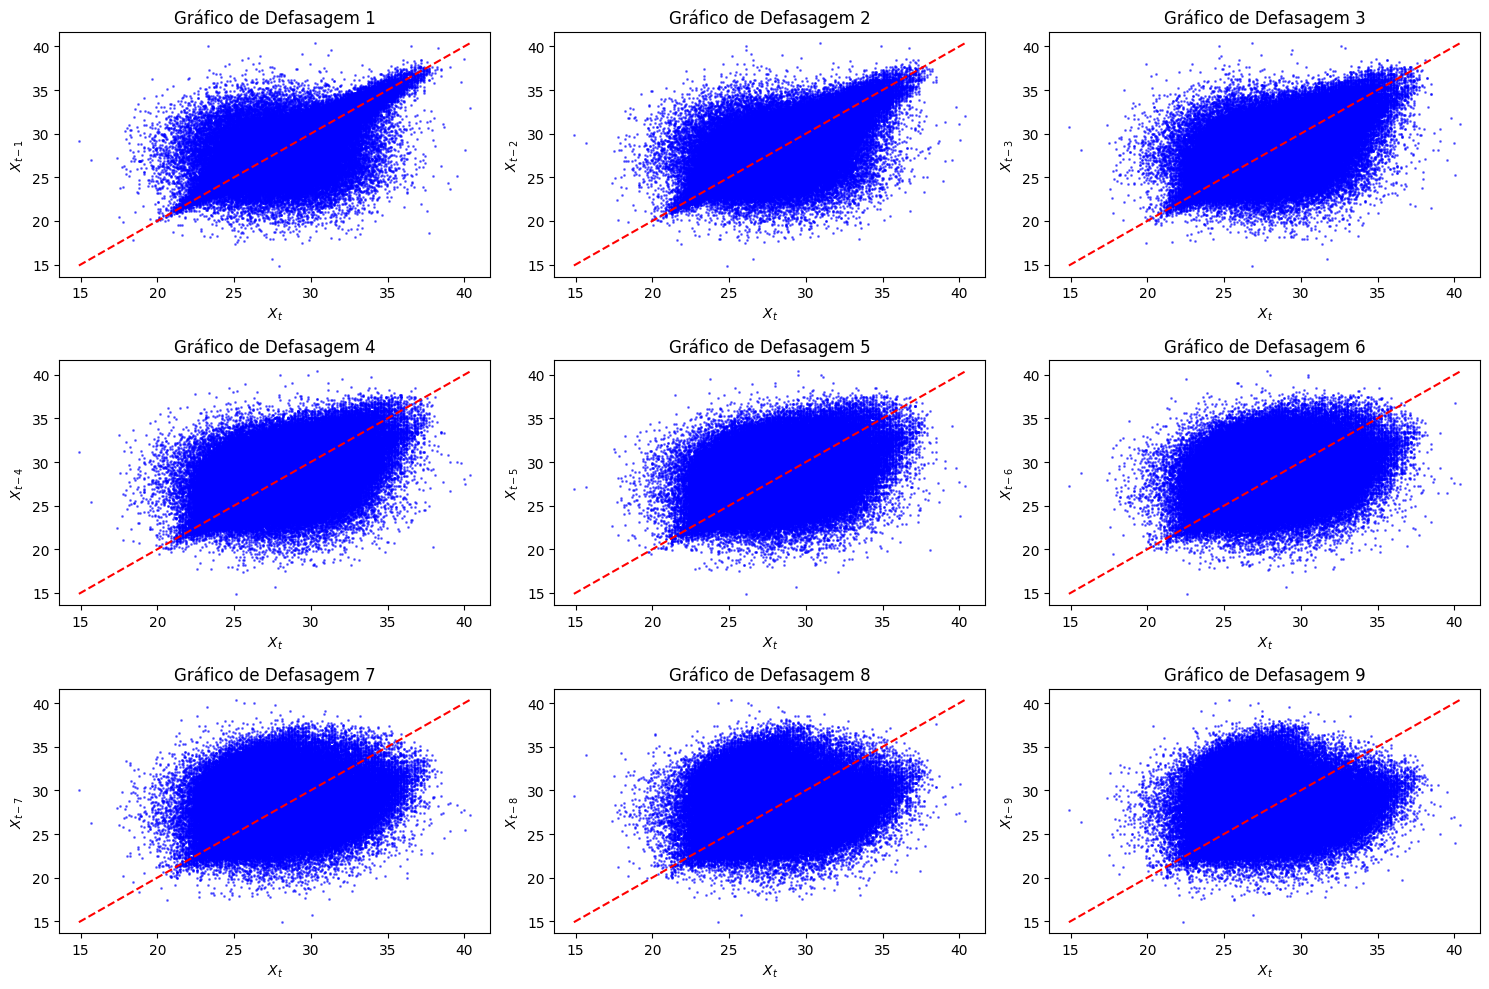

In [13]:
# mdes.plota_grafico_de_defasagens(df_AM.shape[0], df_AM[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_AM.shape[0], df_AM[atr_imagem].tolist(), 9)

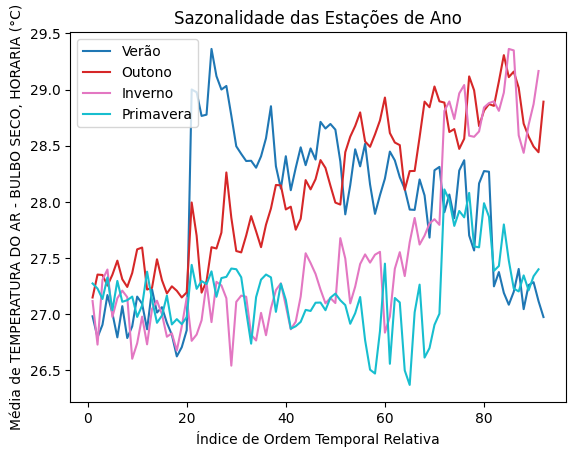

In [14]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_AM, atr_temporal, atr_imagem)

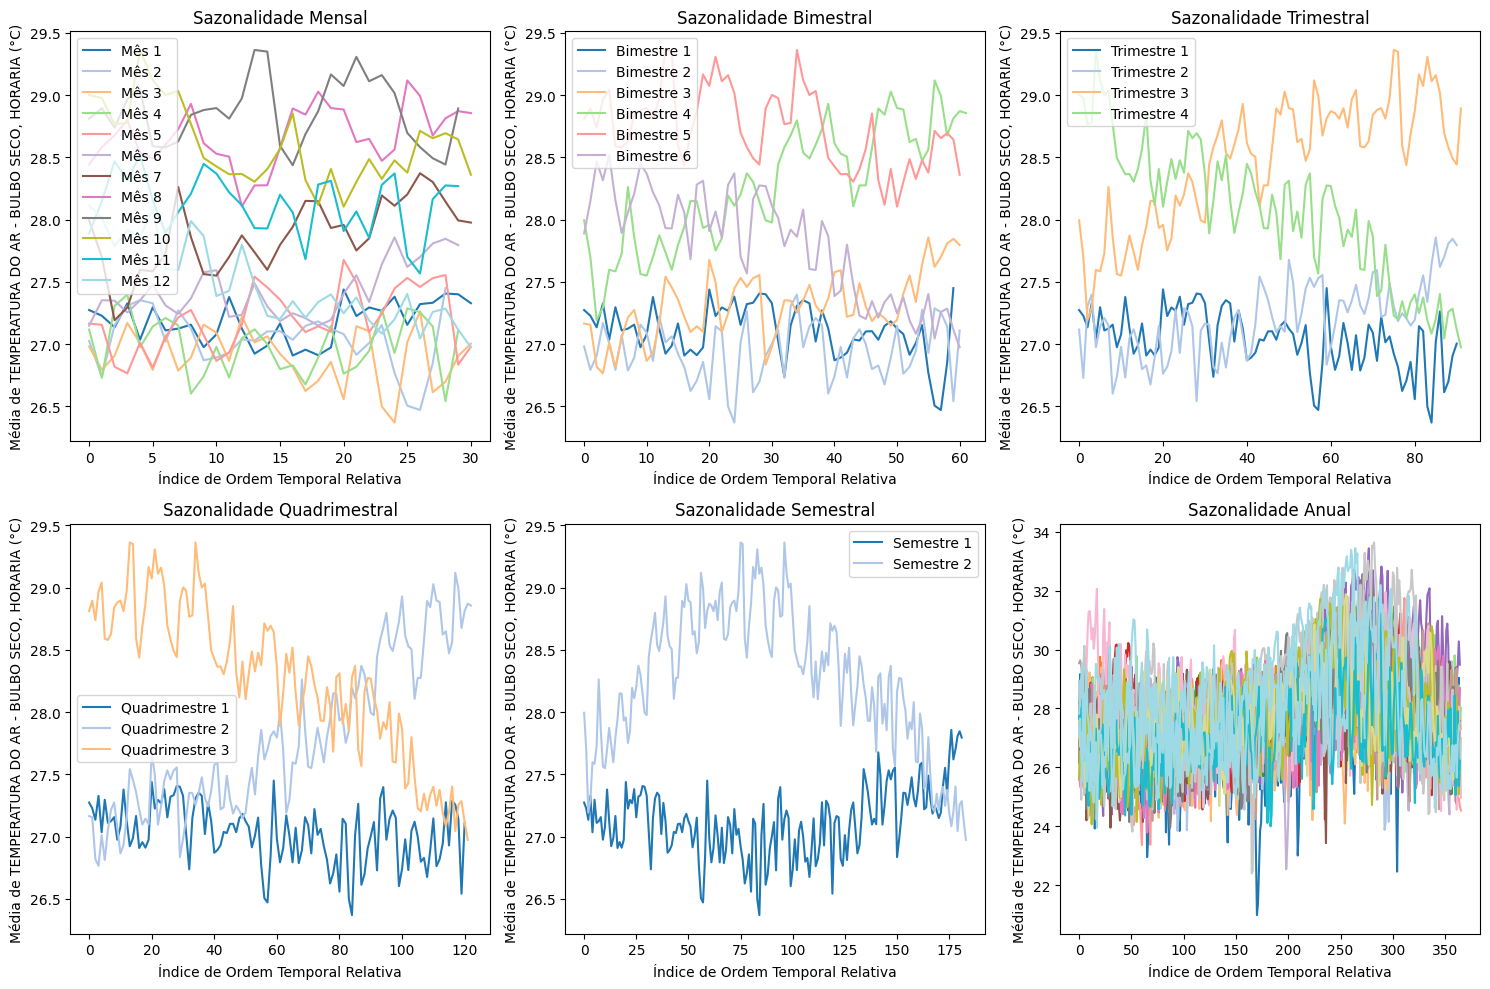

In [15]:
mdes.plota_grafico_de_sazonalidade_geral(df_AM, atr_temporal, atr_imagem)

### Salvador:

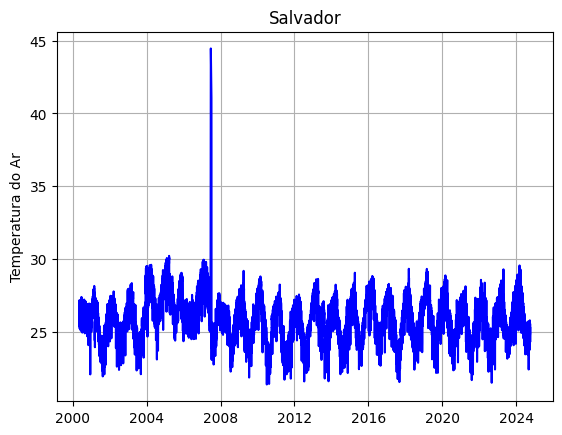

In [16]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_BA, atr_temporal, atr_imagem, "Salvador", "Temperatura do Ar")

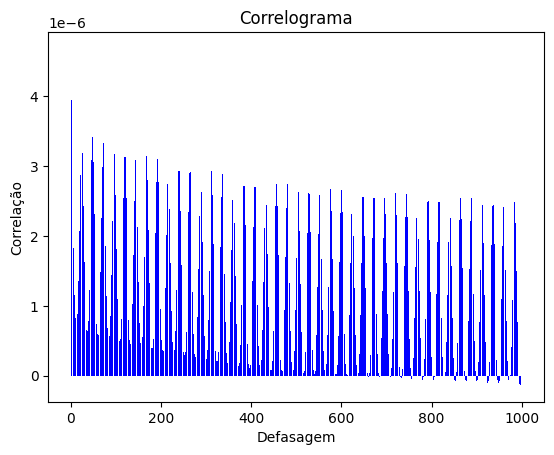

In [17]:
mdes.plota_correlograma(df_BA.shape[0], df_BA[atr_imagem].tolist(), 1000)

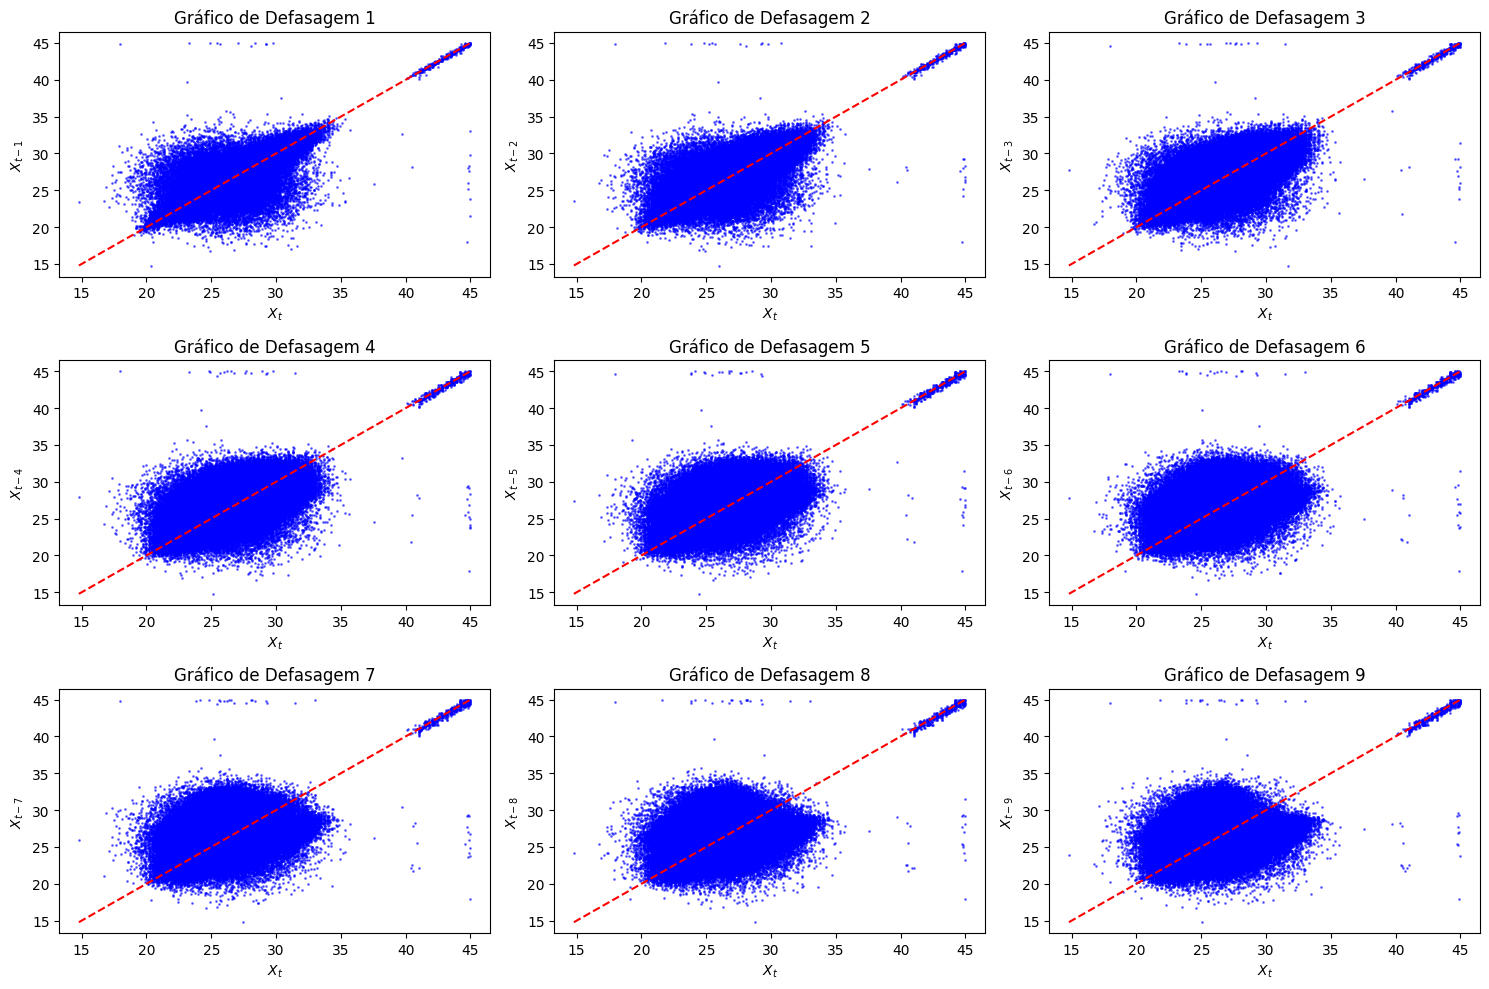

In [18]:
# mdes.plota_grafico_de_defasagens(df_BA.shape[0], df_BA[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_BA.shape[0], df_BA[atr_imagem].tolist(), 9)

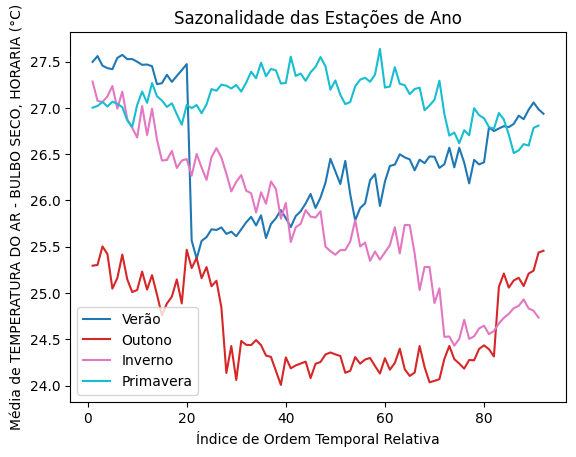

In [19]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_BA, atr_temporal, atr_imagem)

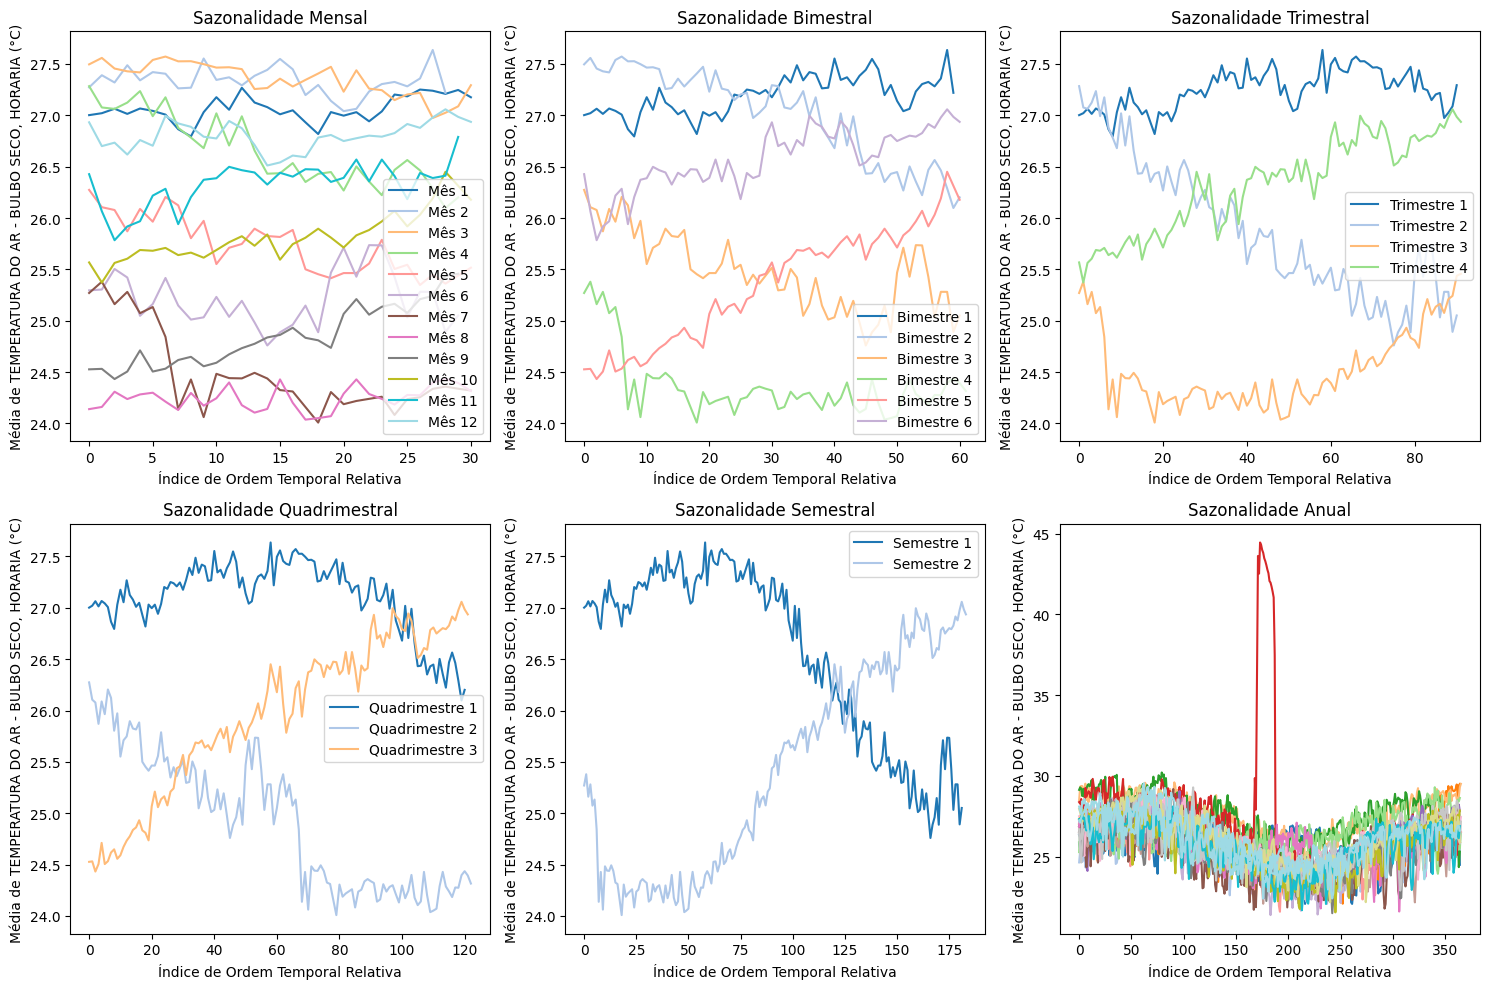

In [20]:
mdes.plota_grafico_de_sazonalidade_geral(df_BA, atr_temporal, atr_imagem)

### Rio de Janeiro:

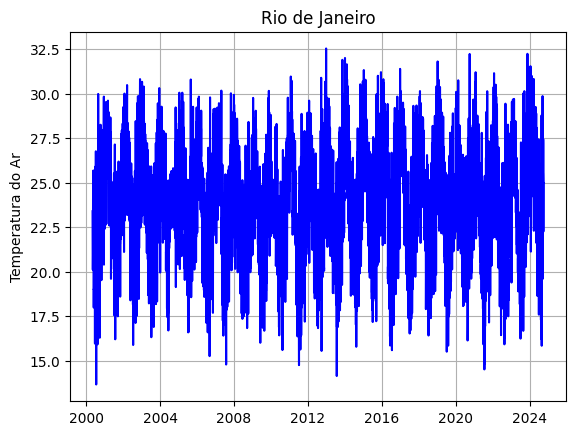

In [21]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_RJ, atr_temporal, atr_imagem, "Rio de Janeiro", "Temperatura do Ar")

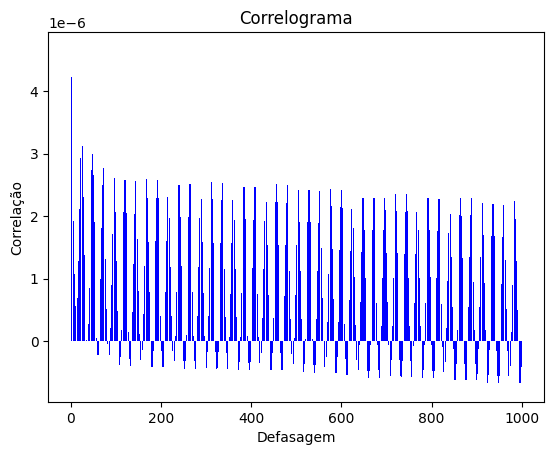

In [22]:
mdes.plota_correlograma(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 1000)

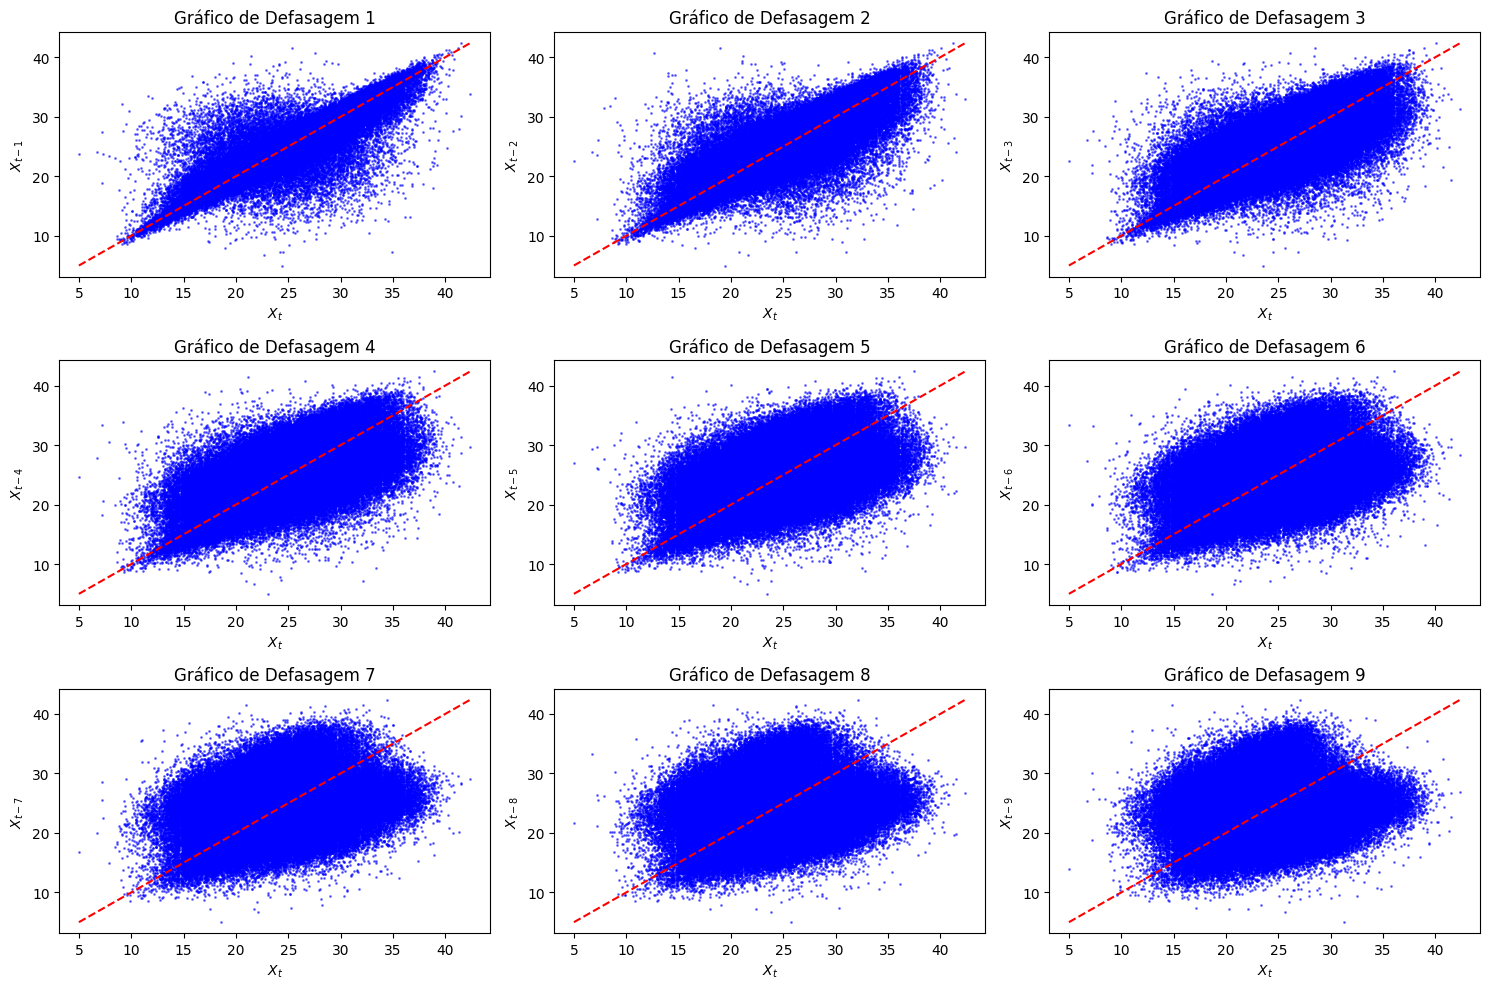

In [23]:
# mdes.plota_grafico_de_defasagens(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 9)

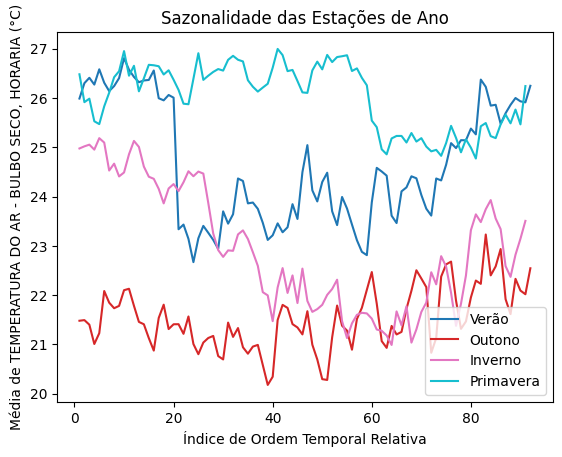

In [24]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_RJ, atr_temporal, atr_imagem)

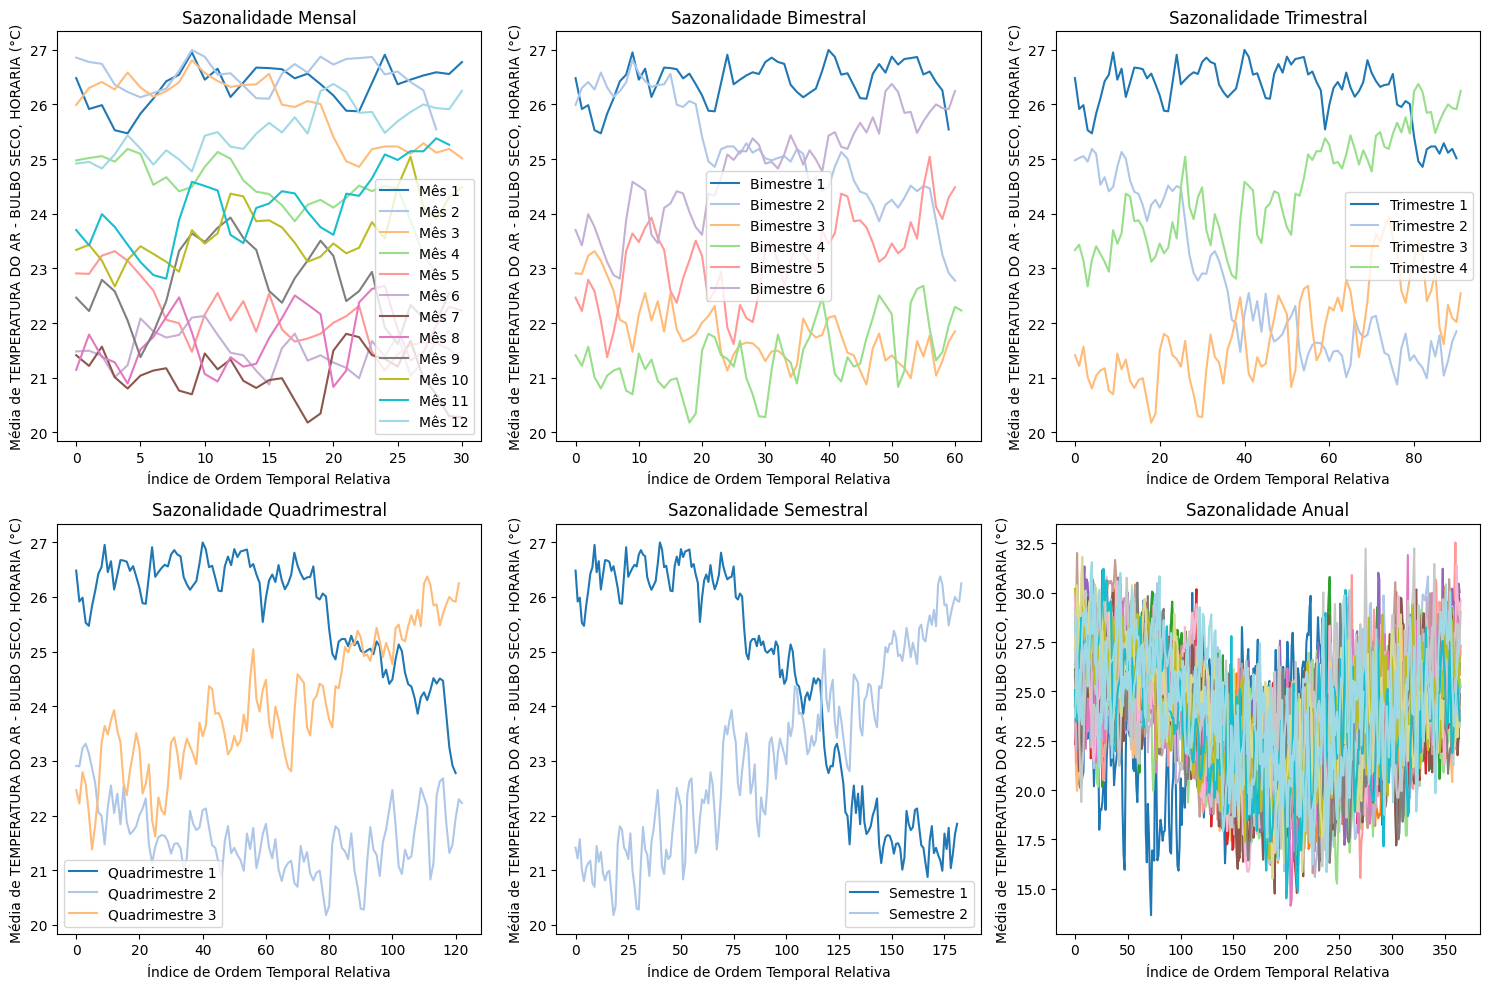

In [25]:
mdes.plota_grafico_de_sazonalidade_geral(df_RJ, atr_temporal, atr_imagem)

### Porto Alegre:

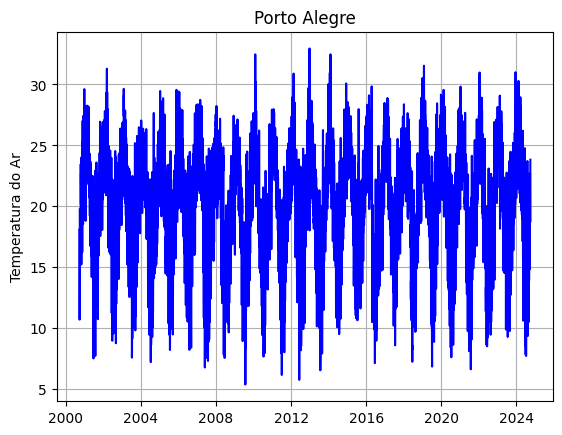

In [26]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_RS, atr_temporal, atr_imagem, "Porto Alegre", "Temperatura do Ar")

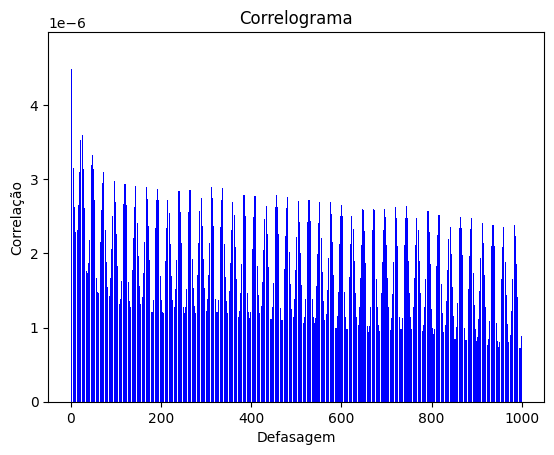

In [27]:
mdes.plota_correlograma(df_RS.shape[0], df_RS[atr_imagem].tolist(), 1000)

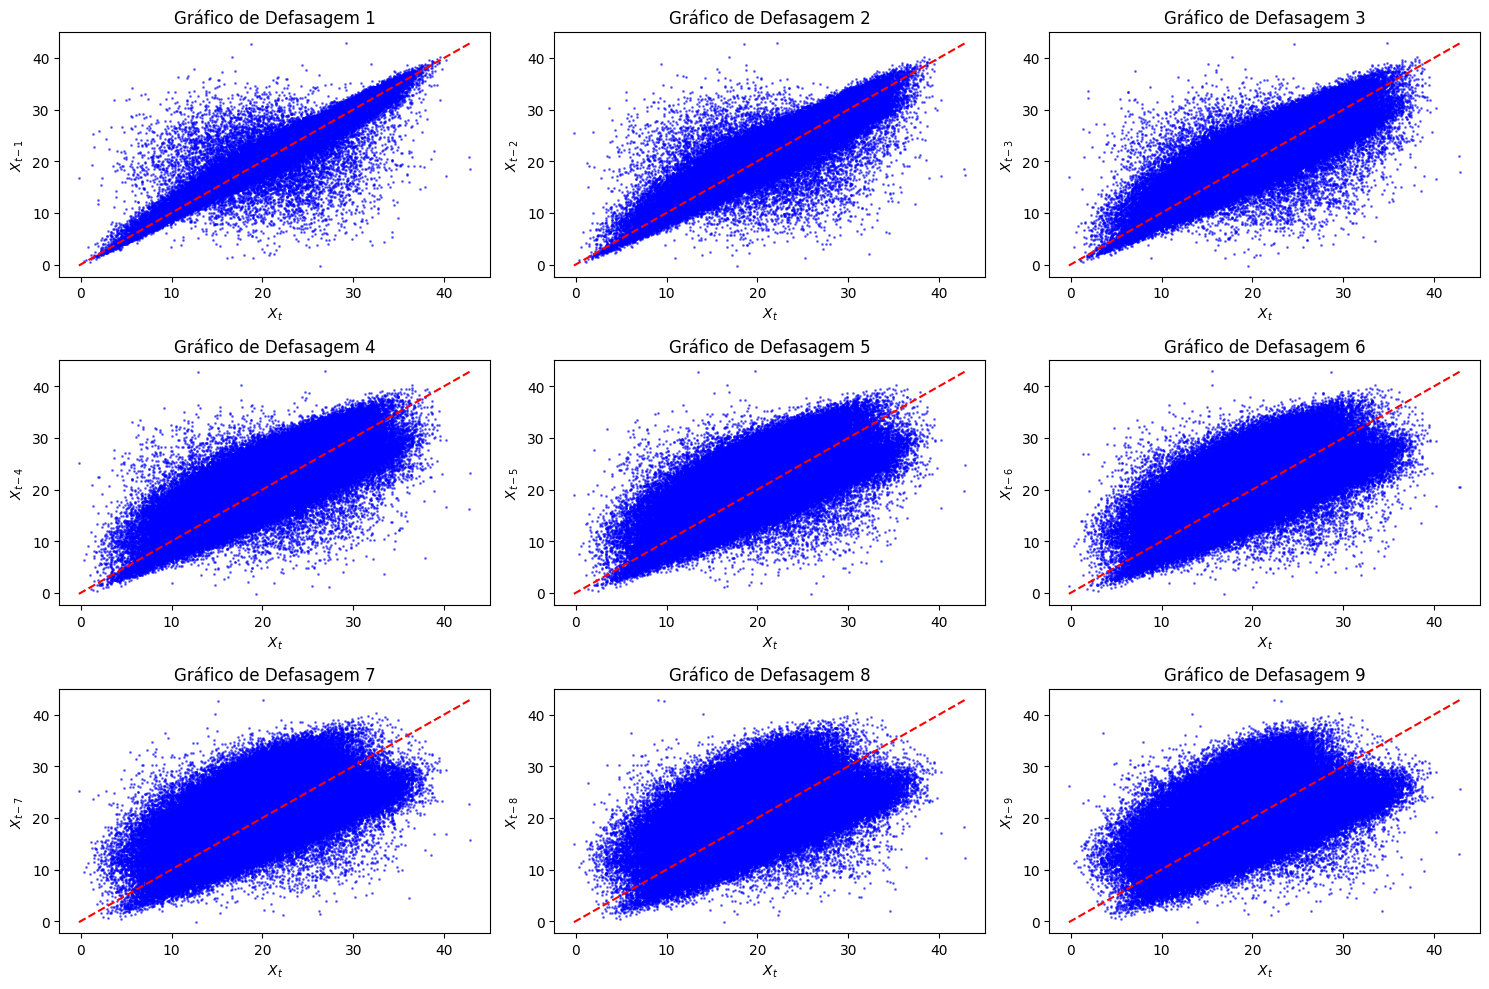

In [28]:
# mdes.plota_grafico_de_defasagens(df_RS.shape[0], df_RS[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_RS.shape[0], df_RS[atr_imagem].tolist(), 9)

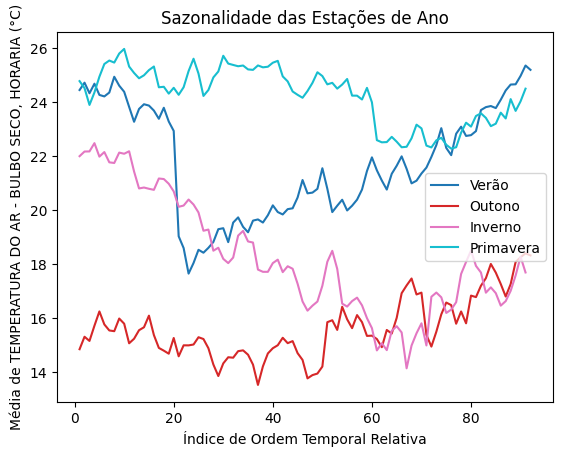

In [29]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_RS, atr_temporal, atr_imagem)

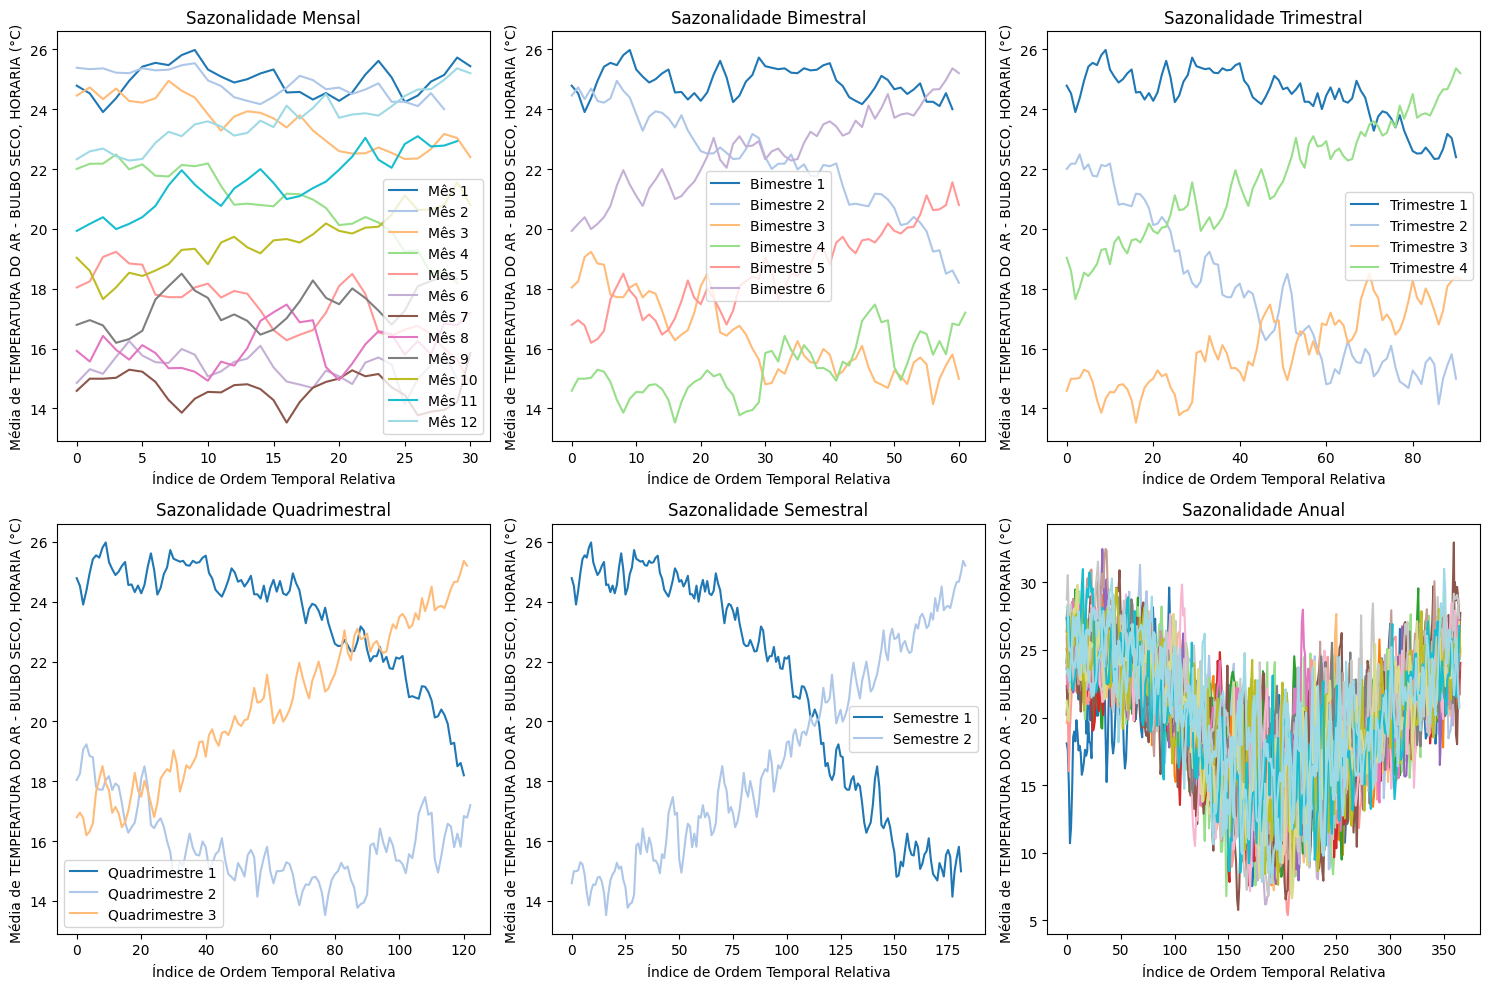

In [30]:
mdes.plota_grafico_de_sazonalidade_geral(df_RS, atr_temporal, atr_imagem)

## Precipitação:

In [31]:
atr_imagem = "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"

### Distrito Federal:

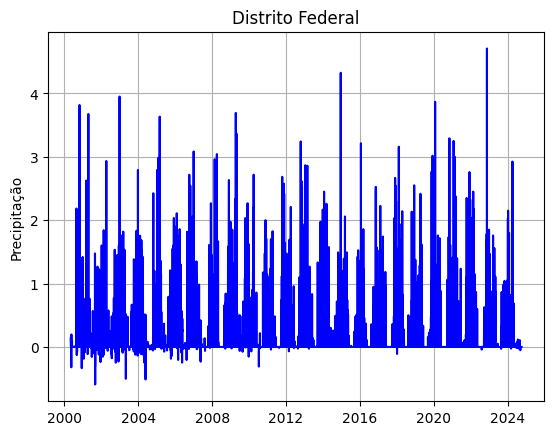

In [32]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_DF, atr_temporal, atr_imagem, "Distrito Federal", "Precipitação")

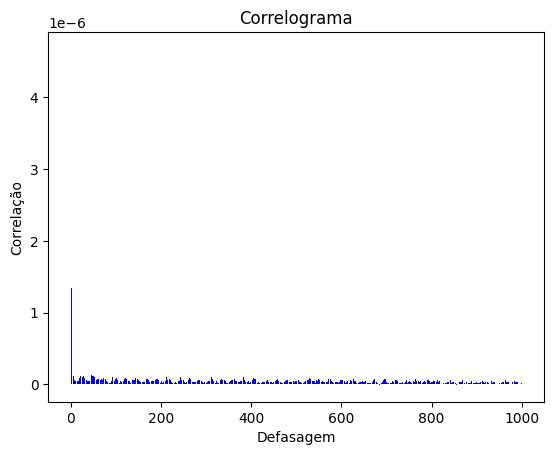

In [33]:
mdes.plota_correlograma(df_DF.shape[0], df_DF[atr_imagem].tolist(), 1000)

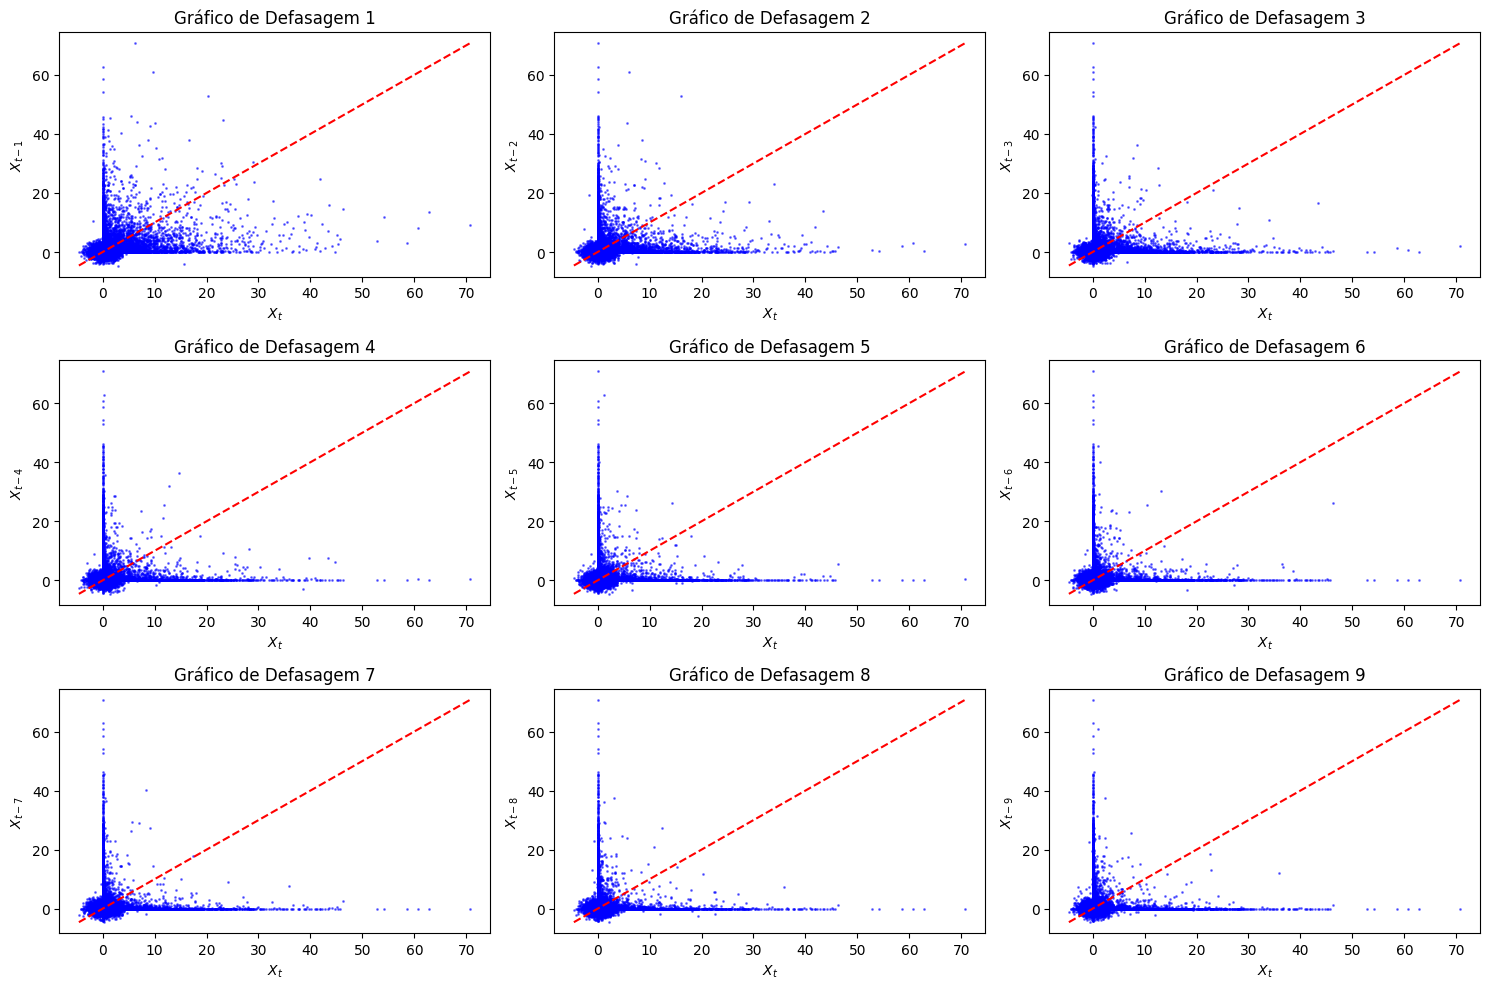

In [34]:
# mdes.plota_grafico_de_defasagens(df_DF.shape[0], df_DF[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_DF.shape[0], df_DF[atr_imagem].tolist(), 9)

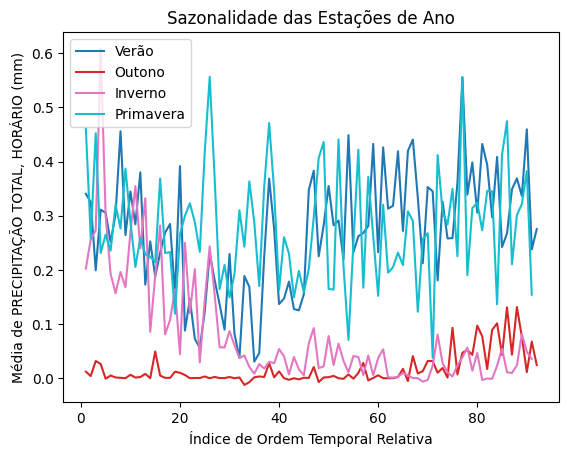

In [35]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_DF, atr_temporal, atr_imagem)

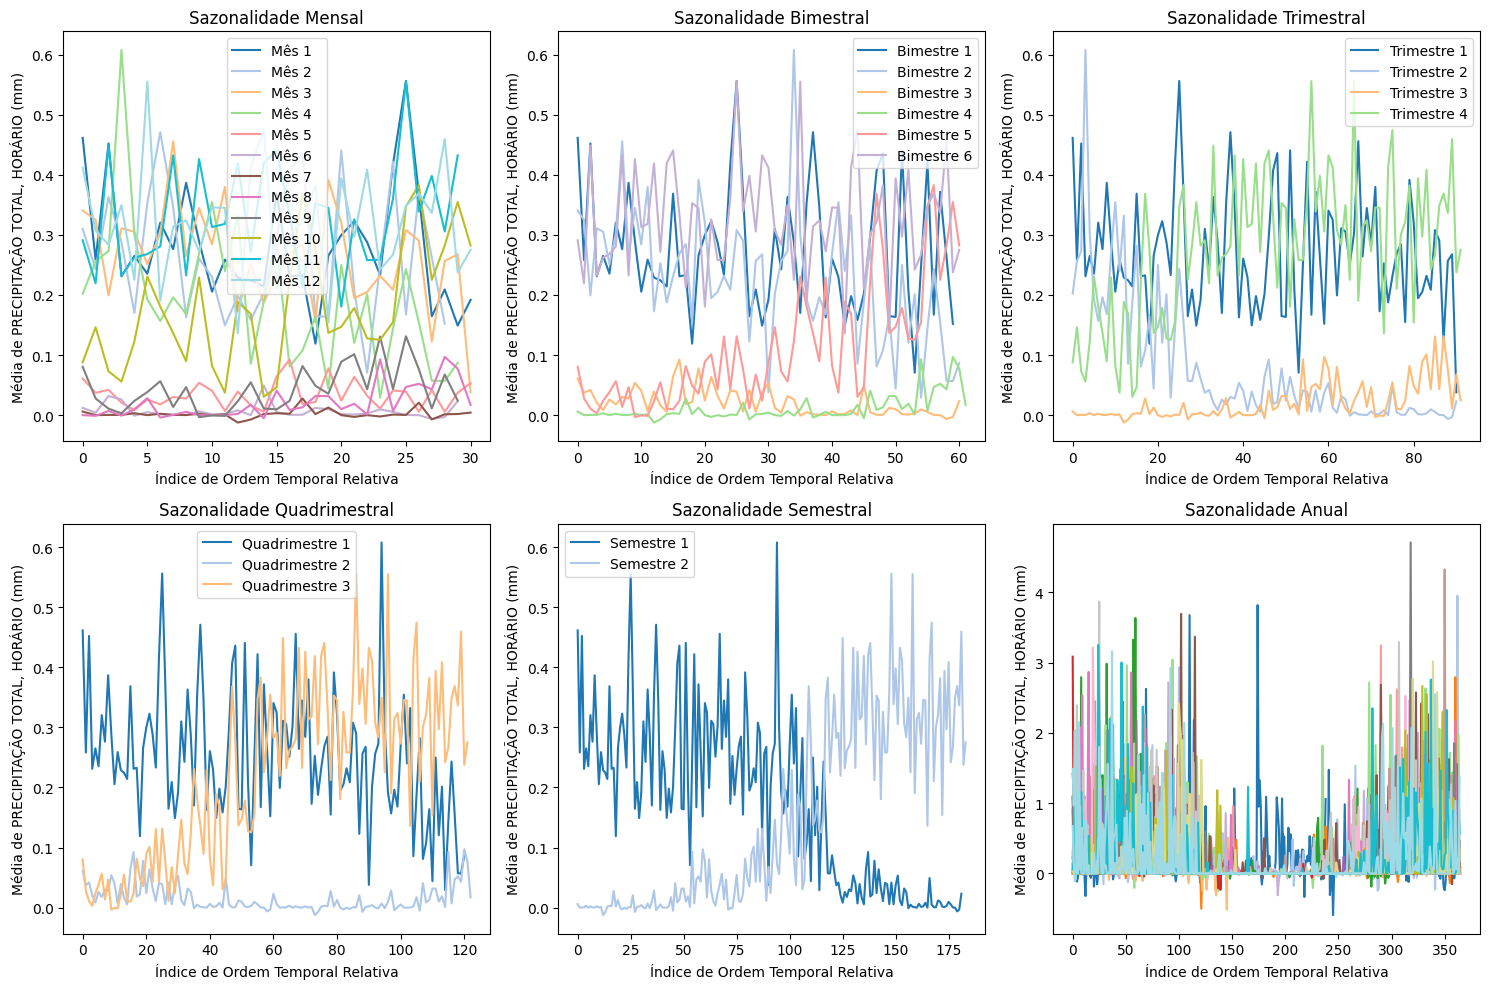

In [36]:
mdes.plota_grafico_de_sazonalidade_geral(df_DF, atr_temporal, atr_imagem)

### Manaus:

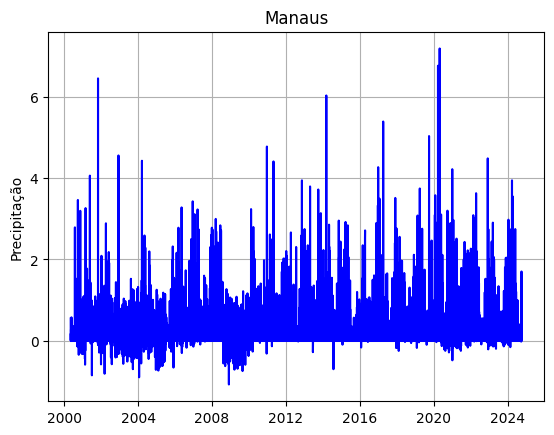

In [37]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_AM, atr_temporal, atr_imagem, "Manaus", "Precipitação")

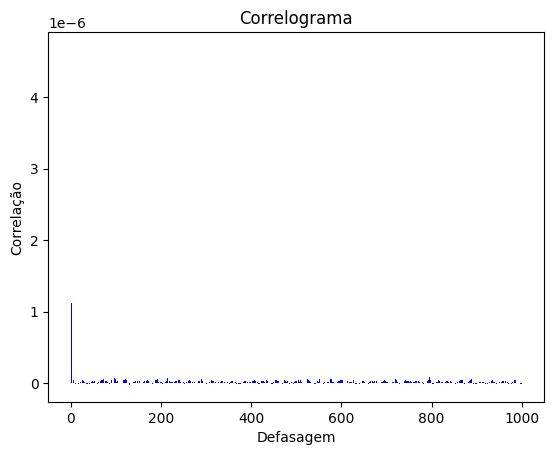

In [38]:
mdes.plota_correlograma(df_AM.shape[0], df_AM[atr_imagem].tolist(), 1000)

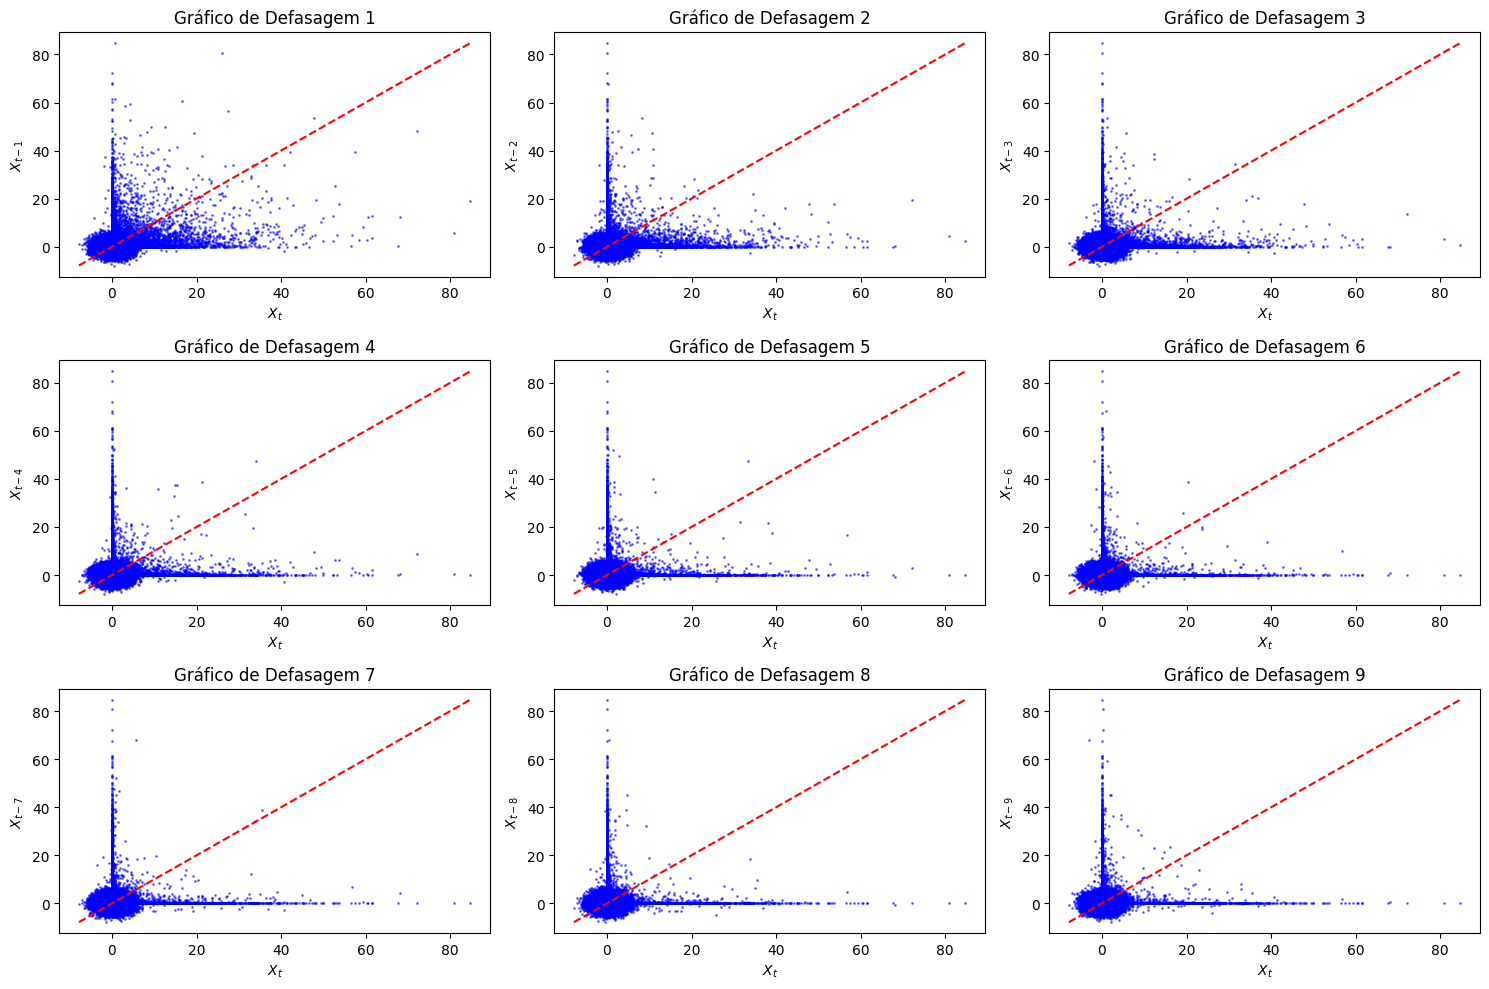

In [39]:
# mdes.plota_grafico_de_defasagens(df_AM.shape[0], df_AM[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_AM.shape[0], df_AM[atr_imagem].tolist(), 9)

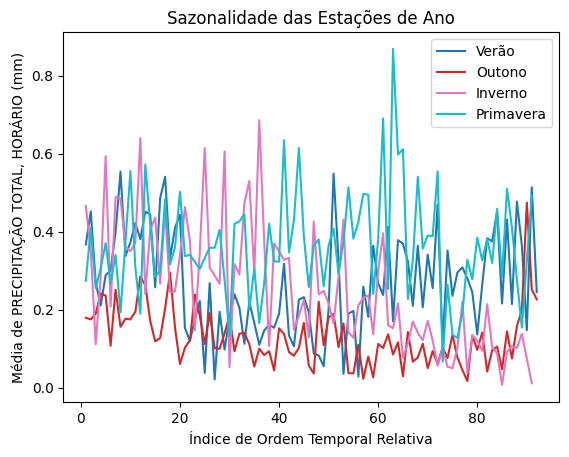

In [40]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_AM, atr_temporal, atr_imagem)

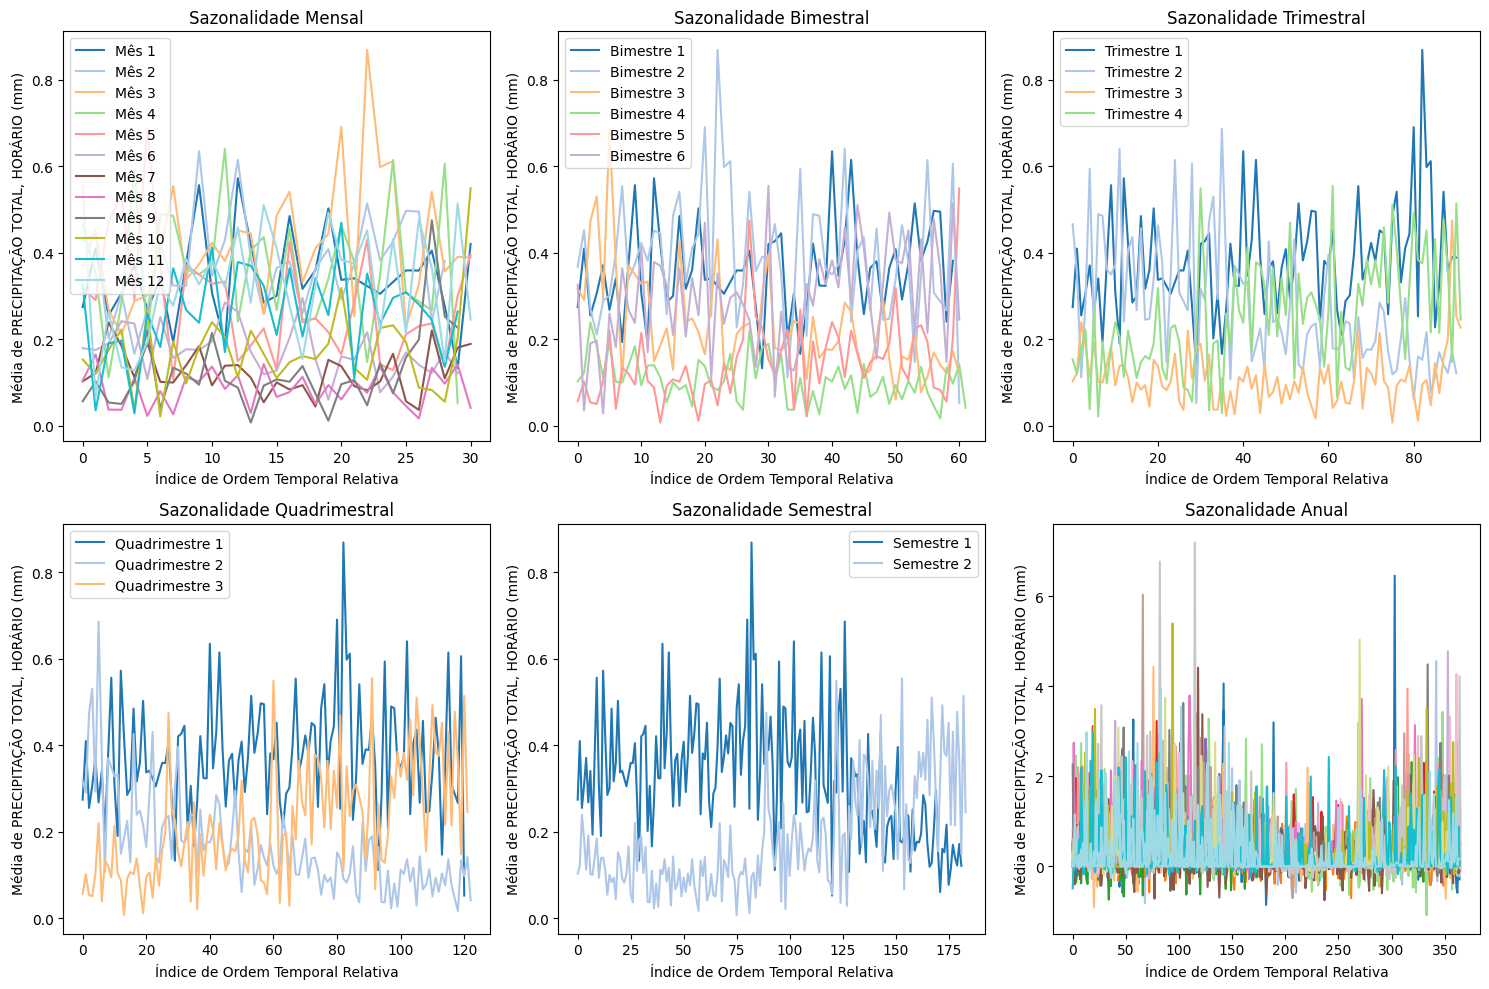

In [41]:
mdes.plota_grafico_de_sazonalidade_geral(df_AM, atr_temporal, atr_imagem)

### Salvador:

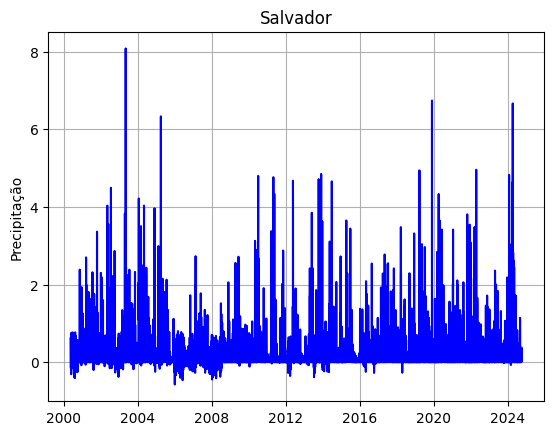

In [42]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_BA, atr_temporal, atr_imagem, "Salvador", "Precipitação")

In [ ]:
mdes.plota_correlograma(df_BA.shape[0], df_BA[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_BA.shape[0], df_BA[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_BA.shape[0], df_BA[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_BA, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_BA, atr_temporal, atr_imagem)

### Rio de Janeiro:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_RJ, atr_temporal, atr_imagem, "Rio de Janeiro", "Precipitação")

In [ ]:
mdes.plota_correlograma(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_RJ, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_RJ, atr_temporal, atr_imagem)

### Porto Alegre:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_RS, atr_temporal, atr_imagem, "Porto Alegre", "Precipitação")

In [ ]:
mdes.plota_correlograma(df_RS.shape[0], df_RS[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_RS.shape[0], df_RS[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_RS.shape[0], df_RS[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_RS, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_RS, atr_temporal, atr_imagem)

## Radiação:

In [57]:
atr_imagem = "RADIACAO_GLOBAL(Kj/m²)_mod"

### Distrito Federal:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_DF, atr_temporal, atr_imagem, "Distrito Federal", "Radiação")

In [ ]:
mdes.plota_correlograma(df_DF.shape[0], df_DF[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_DF.shape[0], df_DF[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_DF.shape[0], df_DF[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_DF, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_DF, atr_temporal, atr_imagem)

### Manaus:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_AM, atr_temporal, atr_imagem, "Manaus", "Radiação")

In [ ]:
mdes.plota_correlograma(df_AM.shape[0], df_AM[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_AM.shape[0], df_AM[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_AM.shape[0], df_AM[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_AM, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_AM, atr_temporal, atr_imagem)

### Salvador:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_BA, atr_temporal, atr_imagem, "Salvador", "Radiação")

In [ ]:
mdes.plota_correlograma(df_BA.shape[0], df_BA[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_BA.shape[0], df_BA[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_BA.shape[0], df_BA[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_BA, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_BA, atr_temporal, atr_imagem)

### Rio de Janeiro:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_RJ, atr_temporal, atr_imagem, "Rio de Janeiro", "Radiação")

In [ ]:
mdes.plota_correlograma(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_RJ.shape[0], df_RJ[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_RJ, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_RJ, atr_temporal, atr_imagem)

### Porto Alegre:

In [ ]:
mdes.plota_grafico_no_tempo_sumarizado_por_dia(df_RS, atr_temporal, atr_imagem, "Porto Alegre", "Radiação")

In [ ]:
mdes.plota_correlograma(df_RS.shape[0], df_RS[atr_imagem].tolist(), 1000)

In [ ]:
# mdes.plota_grafico_de_defasagens(df_RS.shape[0], df_RS[atr_imagem].tolist(), 3)
mdes.plota_grafico_de_multiplos_graficos_de_defasagens(df_RS.shape[0], df_RS[atr_imagem].tolist(), 9)

In [ ]:
mdes.plota_grafico_de_sazonalidade_de_estacoes_do_ano(df_RS, atr_temporal, atr_imagem)

In [ ]:
mdes.plota_grafico_de_sazonalidade_geral(df_RS, atr_temporal, atr_imagem)